<h1>Support Vector Machines (SVM) Note</h1>

<p>This note explains the basic concepts of Support Vector Machines (SVMs) using HTML formatting, mathematical formulas, and Python code examples.</p>

<h2>1. Overview</h2>
<p>
  SVM is a supervised learning algorithm used primarily for classification (and also for regression). It works by finding an <b>optimal hyperplane</b> that separates data points of different classes with the maximum margin. The data points that lie closest to the hyperplane are known as <b>support vectors</b>.
</p>

<h2>2. Mathematical Formulation</h2>
<p>
  The <b>hard-margin SVM</b> optimization problem is formulated as:
</p>
<p style="text-align: center;">
  $$\min_{\mathbf{w},\,b}\; \frac{1}{2}\|\mathbf{w}\|^2$$
</p>
<p>
  subject to
</p>
<p style="text-align: center;">
  $$y_i \,(\mathbf{w}^\top \mathbf{x}_i - b) \ge 1 \quad \text{for all } i.$$
</p>

<p>
  In real-world scenarios, data might not be perfectly separable. The <b>soft-margin SVM</b> introduces slack variables <em>\(\xi_i\)</em> to allow misclassifications:
</p>
<p style="text-align: center;">
  $$\min_{\mathbf{w},\,b,\,\xi}\; \frac{1}{2}\|\mathbf{w}\|^2 + C\sum_{i=1}^{n}\xi_i$$
</p>
<p>
  subject to
</p>
<p style="text-align: center;">
  $$y_i \,(\mathbf{w}^\top \mathbf{x}_i - b) \ge 1 - \xi_i,\quad \xi_i \ge 0 \quad \text{for all } i.$$
</p>

<h2>3. Python Implementation Example</h2>
<p>
  The following Python code demonstrates a simple SVM implementation using the <code>scikit-learn</code> library on the iris dataset.
</p>


Test set accuracy: 1.0


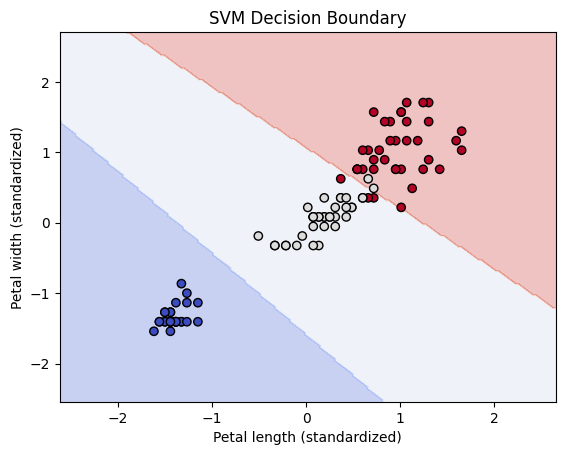

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the iris dataset and select two features for visualization (petal length and petal width)
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train_scaled, y_train)

# Predict the labels of the test set and print the accuracy
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Function to visualize the decision boundary
def plot_decision_boundary(clf, X, y):
    # Define the range for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    # Predict labels for every point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length (standardized)')
    plt.ylabel('Petal width (standardized)')
    plt.title('SVM Decision Boundary')
    plt.show()

# Visualize the decision boundary on the training data
plot_decision_boundary(clf, X_train_scaled, y_train)


<h2>4. Conclusion</h2>
<p>
  In this note, we provided an overview of SVMs along with their mathematical formulation and a practical implementation using Python and scikit-learn. You can experiment further by trying different kernels (e.g., 'rbf', 'poly') and adjusting hyperparameters such as <em>C</em> and <em>gamma</em> to see how the decision boundary adapts to various datasets.
</p>
